<h3>무작정 따라하기-9-1</h3>

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rc
# rc는 모듈이 아니라 matplotlib 내 모듈에 내장된 설정용 함수
# so, import 패키지명.모듈명이 아니라 
# from 모듈명 import 함수명으로 작성해야함. from 절 먼저! 
plt.rcParams['font.family'] = "HCR Dotum"  # 한글 인코딩 옵션

# 패키지(package) = 모듈들을 담는 폴더
# 모듈(module) = .py 파일 하나
# 함수(function) = 모듈에 내장되어있는 함수 
# 객체(object) = 클래스로부터 생성된 실체(데이터 + 행동)

# matplotlib   = 패키지
# pyplot       = matplotlib 안의 모듈
# plt.plot     = 함수


In [4]:
gold = [2,6,6,3,5,2]
year = [f"{x}년" for x in range(2002, 2024, 4)]
year

['2002년', '2006년', '2010년', '2014년', '2018년', '2022년']

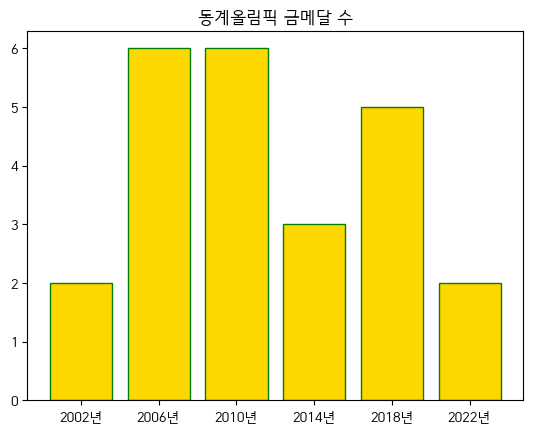

In [5]:
fig, ax = plt.subplots()
# fig : 객체 (figure) 
# ax : 실제로 그래프가 그려지는 영역 
# cf 객체이기 때문에 "."으로 속성과 메소드에 접근 가능 

ax.bar(year, gold, color = 'gold', edgecolor='green')
ax.set_title("동계올림픽 금메달 수")
plt.show()

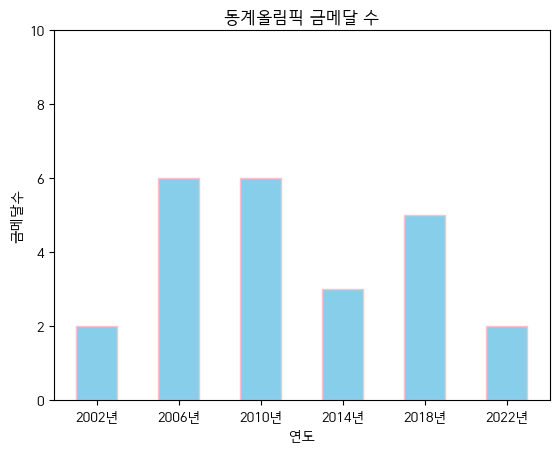

In [6]:
# 막대그래프 & 제목 등 옵션 지정 
fig, ax = plt.subplots()

ax.bar(year, gold, color = 'skyblue', edgecolor='pink', width=0.5)
ax.set_title("동계올림픽 금메달 수")
ax.set_xlabel("연도")
ax.set_ylabel("금메달수")
ax.set_ylim(0,10)
plt.show()

In [7]:
import pandas as pd 

df = pd.read_excel("K팀 대학 생활 만족도 설문(응답).xlsx")
df.iloc[:4, :7]

,id,Q1,Q2,Q3,Q4,Q5,Q6
0,1,남자,3학년,인사대,6,그렇다,보통
1,2,여자,1학년,디자인대,6,그렇다,만족
2,3,여자,1학년,과기대,6,그렇다,보통
3,4,여자,1학년,인사대,5,보통,만족


In [8]:
# 빈도표

tbl = pd.crosstab(df.Q6, columns='count')
tbl

col_0,count
Q6,
만족,13
매우 만족,5
매우 불만족,5
보통,7
불만족,9


In [9]:
type(tbl)

pandas.core.frame.DataFrame

In [10]:
tbl.index

Index(['만족', '매우 만족', '매우 불만족', '보통', '불만족'], dtype='object', name='Q6')

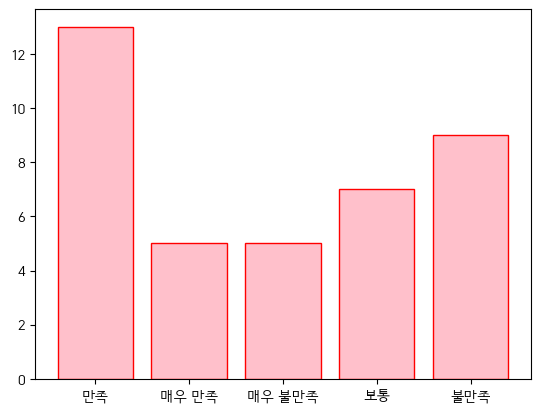

In [11]:
fig, ax = plt.subplots()
# Figure 클래스와 Axes 클래스를 생성하여 객체 생성하는 함수 subplots()
# fig 객체 하나 (그래프 전체를 담는 큰 틀, so, figsize로 크기 조정도 가능, 해상도, 배경색, 저장기능 등 옵션가능 , 여러 axes 그래프 영역을 품는 상위구조)
# ax 객체 하나  (실제로 그 그래프가 그려지는 영역, x,y축 관리, 제목, 라벨, 눈금, 그래프의 종류 (bar(), plot(), scatter()과 같은 그래프 메서드 가능))

ax.bar(tbl.index, tbl['count'], color = 'pink', edgecolor='red')
plt.show()

In [12]:
tbl2 = tbl.iloc[[2,4,3,0,1], :]
tbl2

col_0,count
Q6,
매우 불만족,5
불만족,9
보통,7
만족,13
매우 만족,5


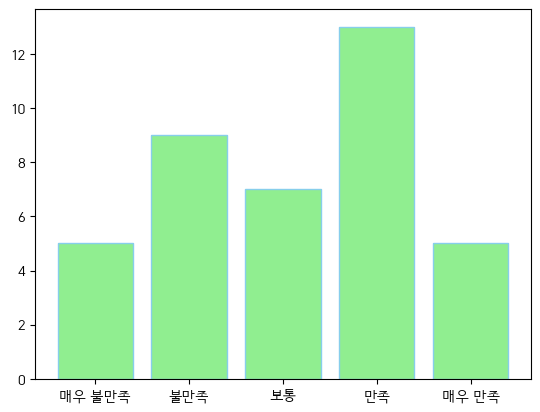

In [13]:
fig, ax = plt.subplots()

ax.bar(tbl2.index, tbl2['count'], color='lightgreen', edgecolor='skyblue')
plt.show()

In [14]:
# 다른 방법으로 빈도표 구하기 not crosstab

tbl3 = df['Q5'].value_counts()
tbl3

Q5
그렇다       27
보통         7
매우 그렇다     5
그렇지 않다     1
Name: count, dtype: int64

In [15]:
tbl3.index

Index(['그렇다', '보통', '매우 그렇다', '그렇지 않다'], dtype='object', name='Q5')

In [16]:
tbl3.values

array([27,  7,  5,  1])

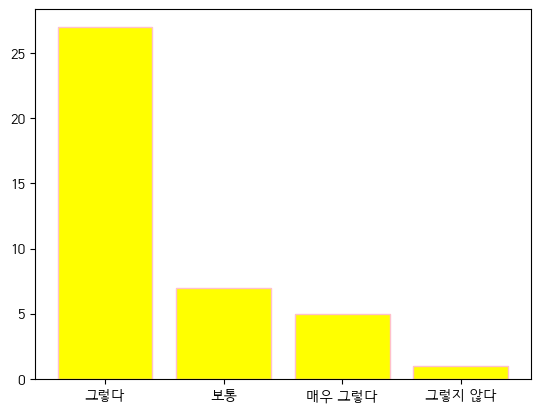

In [17]:
fig, ax = plt.subplots()
ax.bar(tbl3.index, tbl3.values, color = 'yellow', edgecolor='pink')
plt.show()

In [18]:
# 원 그래프의 빈도표 구하기 

tbl1 = pd.crosstab(df['Q3'], columns='count')
tbl1

col_0,count
Q3,
과기대,23
디자인대,8
딘자인대,1
인사대,9


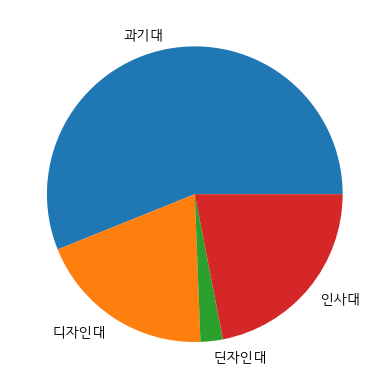

In [27]:
fig, ax = plt.subplots()
ax.pie(tbl1['count'], labels=tbl1.index)
plt.show()

# ax.pie(tbl1.count, labels=tbl1.index) df(객체) 내의 속성 접근시 '.'으로 불가한 이유

# DataFrame은 객체다. pandas 내부에 DataFrame이라는 클래스가 존재하고, 호출하여 인자에 data 넣어주면 자동으로 객체가 생성된다.
# 점(.) 접근은 객체 속성(attribute) 접근 방식.
# pandas는 컬럼명도 attribute처럼 접근되도록 ‘편의 기능’을 넣었다
# 하지만 “객체 속성 우선 규칙” 때문에 컬럼과 메서드가 충돌하면 문제가 생긴다
# pandas엔 count() 메소드가 존재하므로 해당 count는 "."으로 접근 불가


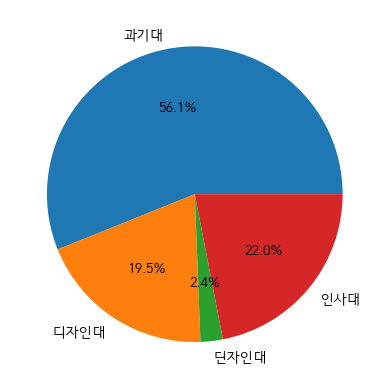

In [29]:
fig, ax = plt.subplots()

ax.pie(tbl1['count'], labels=tbl1.index, autopct="%1.1f%%")
plt.show()

# % : 문자열 포맷팅 키워드 %d, %f 등등.. 
# 클래스의 __init__ 안에서 자동으로 index 객체를 만들어서 df에 붙임.
# DataFrame = 객체, Index = 객체 (not 함수!) -> index는 DataFrame의 일부로 자동 생성되는 속성(attribute)

In [31]:
import pandas as pd 

df = pd.read_excel("고속터미널-25-10.xlsx")
df

,date,line,stn,geton,getoff
0,20251001,3호선,고속터미널,46131,45906
1,20251001,7호선,고속터미널,17910,16294
2,20251001,9호선,고속터미널,15793,20362
3,20251002,3호선,고속터미널,53507,66014
4,20251002,7호선,고속터미널,19734,18442
...,...,...,...,...,...
88,20251030,7호선,고속터미널,18499,16164
89,20251030,9호선,고속터미널,16407,20940
90,20251031,3호선,고속터미널,58103,57720
91,20251031,7호선,고속터미널,22087,17232


In [37]:
# 그룹별 평균 구하기 
data = df[['line','geton','getoff']]
grp = data.groupby('line')
result = round(grp.mean(), 1)
result

# data = df[df.line, df.geton, df.getoff] (x)
# df [] 데이터프레임 필터링
# df[ ] 안에 “무엇을 넣느냐”에 따라 행 필터링이 될 수도 있고 컬럼 선택이 될 수도 있다.

# df[ ]는 넣는 값의 타입에 따라 의미가 달라지는 다기능 인덱서
# df[ ] 안에 넣는 값 -> pandas가 해석하는 방식

# <<df[ ] 안에 넣는 자료형(type) 이 모든 걸 결정>>

    # 1) 문자열(str) → 컬럼 1개 선택
        # df['line']

    # 2) 문자열 리스트(list of str) → 여러 컬럼 선택
        # df[['line', 'geton', 'getoff']]
        # -> df['line', 'geton', 'getoff'] 같은 표현은 문법 오류
        
        # 파이썬이 자동으로 다음처럼 처리:
        # df[('line', 'geton', 'getoff')]
        # 즉, 'line', 'geton', 'getoff' 가 리스트가 아니라 튜플(tuple)로 변환.
        # 튜플은 순서가 정해져있지만, 값 바꿀 수 없는 불변 자료형

        # 튜플을 넣으면 pandas는 “컬럼 이름이 ('line','geton','getoff') 인 단일 컬럼을 가져오라”
        # 라고 해석.
        #     그런 컬럼명은 없음 
        #         -> KeyError

        # 여러 컬럼 선택은 리스트로만 가능하다.
        # df['col1', 'col2'] 는 리스트가 아니라 튜플이 되어버린다.
        # pandas는 튜플을 하나의 컬럼 이름으로 해석한다.
        # 따라서 df['col1','col2'] 는 여러 컬럼 선택이 아니라 잘못된 단일 컬럼 접근이며 에러가 난다.

        # 3) boolean Series → “행 필터링”
        # df[df['line'] == '1호선']     # True/False로 필터링  
        # df[df.geton > 100]            # geton이 100 넘는 행만

            # 따라서 df['line' == '1호선']과 같은 방식은 쓸 수 없음. 
            # 'line' == '1호선' 은 컬럼을 고르는 것이 아니라 문자열끼리 비교하는 연산
            # pandas가 원하는 행 필터가 만들어지지 않음.

            # 먼저 컬럼을 선택하고 그 컬럼 값으로 조건을 만든 후 그 조건을 df[...] 안에 넣는다.



,geton,getoff
line,,
3호선,49513.4,48062.3
7호선,17570.5,13772.8
9호선,15384.5,20842.8


In [ ]:
# 참고 

# Series : 1차원 데이터 구조, DataFrame을 구성하는 하나하나의 열(컬럼).
# 값(데이터)
# 인덱스(index)
# 이름(name)
# 을 가진 1차원 객체

# DataFrame = Series 여러 개를 옆으로 붙여놓은 2차원 구조
 

# pandas
#  ├── Series class
#  │     └── Series 객체 (df['col'])
#  │
#  └── DataFrame class
#        └── DataFrame 객체(df) 
#               ├── __getitem__() → Series 객체 생성 (전달되는 값의 타입에 따라 Series 또는 DataFrame 객체를 생성, 문자열 1개면 Series, 문자열 리스트면 DataFrame을 반환)
#               ├                      따라서! 
#               ├                       df['a'] → Series : 문자열 1개를 인자로 넘기면 __getitem__ 은 Series를 반환.
 #              ├                       df[['a']] → DataFrame : 리스트를 인자로 넘기면, 리스트 길이가 1이어도 __getitem__ 은 DataFrame을 반환.
#               ├── groupby()    → GroupBy 객체 생성
#               └── other methods...()

# GroupBy class
#  └── GroupBy 객체(grp)
#         ├── mean()  → DataFrame
#         ├── sum()   → DataFrame
#         └── agg()   → DataFrame

# -> GroupBy class는 pandas 안에 있는 거고, DataFrame class 내의 groupby() : 객체생성 함수가 있어서 GroupBy 객체를 만들 수 있음.
# 따라서 시리즈는 열 하나이기 때문에, df['a'] 는 'Series' 이지만,
# Jupyter Notebook이나 print 출력 시 "DataFrame처럼 보일 뿐"이다.**
# 즉, 겉모양(출력 형태)은 표처럼 보이지만, 자료형은 Series.